# US Accidents Exploratory Data Analysis

- Dataset Link: https://www.kaggle.com/sobhanmoosavi/us-accidents
- The dataset contains accident records in USA
- Can be useful to prevent accidents
- Mention that this does not contain data about New York

## Data Collection

In [1]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Skipping, found downloaded files in ".\us-accidents" (use force=True to force download)


## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./us-accidents/US_Accidents_Dec21_updated.csv',
                 parse_dates=['Start_Time','End_Time'])
df


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [6]:
df.columns


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [8]:
# Percentage of missing values per column

missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages[missing_percentages > 0]


Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

<AxesSubplot:>

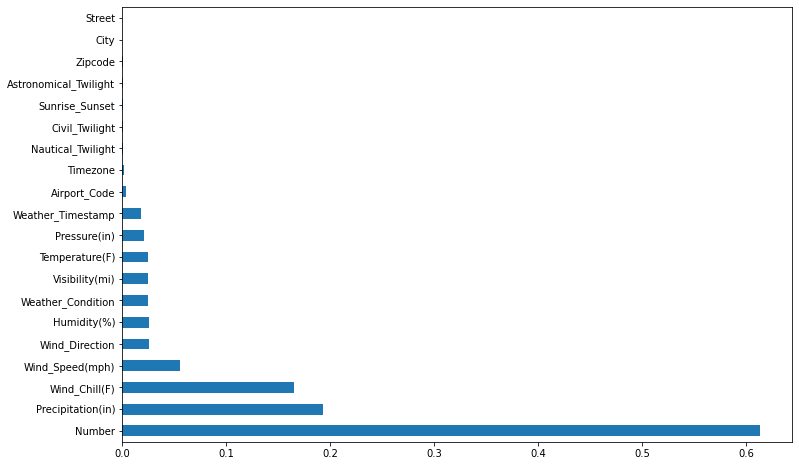

In [9]:
missing_percentages[missing_percentages > 0].plot(kind='barh', figsize=(12,8))

In [10]:
df.select_dtypes(include=['bool']).columns


Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop'],
      dtype='object')

In [11]:
for i in list(df.select_dtypes(include=['bool']).columns):
    print(df[i].value_counts(),"\n")



False    2817352
True       27990
Name: Amenity, dtype: int64 

False    2844321
True        1021
Name: Bump, dtype: int64 

False    2645130
True      200212
Name: Crossing, dtype: int64 

False    2838474
True        6868
Name: Give_Way, dtype: int64 

False    2554837
True      290505
Name: Junction, dtype: int64 

False    2841048
True        4294
Name: No_Exit, dtype: int64 

False    2822711
True       22631
Name: Railway, dtype: int64 

False    2845219
True         123
Name: Roundabout, dtype: int64 

False    2777347
True       67995
Name: Station, dtype: int64 

False    2794942
True       50400
Name: Stop, dtype: int64 

False    2843630
True        1712
Name: Traffic_Calming, dtype: int64 

False    2580079
True      265263
Name: Traffic_Signal, dtype: int64 

False    2845342
Name: Turning_Loop, dtype: int64 



In [12]:
df.drop(["Number", "Bump", "Give_Way","No_Exit", "Turning_Loop", "Roundabout", "Traffic_Calming"], axis=1,inplace=True)

- As the number column is not that important we can drop this column
- Other columns are removed as the data is highly biased to either of the values (Less than 10K values in either of True or False)

<AxesSubplot:>

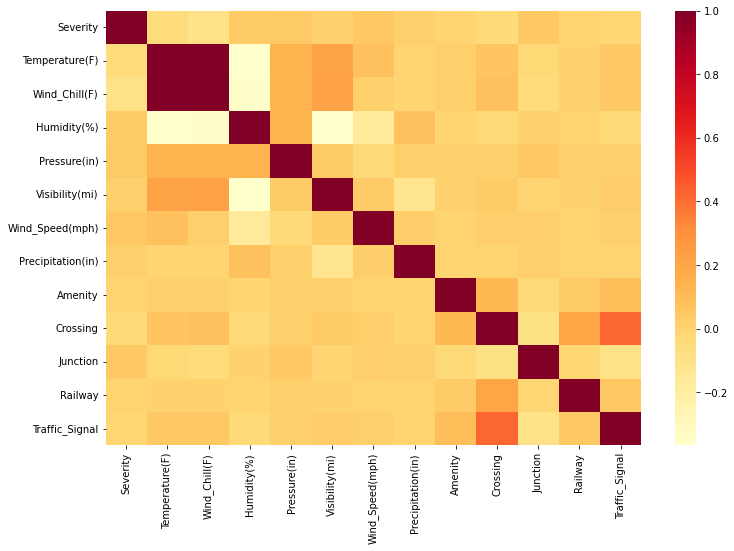

In [13]:
df1 = df[['Severity', 'Temperature(F)', 'Wind_Chill(F)',
          'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 
          'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 
          'Weather_Condition', 'Amenity', 'Crossing', 'Junction', 'Railway',
          'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 
          'Nautical_Twilight', 'Astronomical_Twilight']]
corr = df1.corr()
# corr.sort_index(level=0, ascending=True, inplace=True)
# plot the heatmap
plt.figure(figsize =(12,8))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, cmap="YlOrRd")


- Observations:
    - Temperature and Wind_chill are highly correlated

In [14]:
df1 = df.dropna()
missing_df = df.iloc[list(set(df.index).symmetric_difference(set(df1.index))),:]
print(len(missing_df),len(missing_df)/len(df)*100)
missing_df.Start_Time.dt.year.value_counts()

638017 22.42320958253876


2017    156428
2018    153882
2016    118554
2021     94406
2019     62483
2020     52264
Name: Start_Time, dtype: int64

In [15]:
missing_data = pd.concat([df.Start_Time.dt.year.value_counts(),
          missing_df.Start_Time.dt.year.value_counts()], axis=1, join="inner")
missing_data.columns = ["df", "missing_df"]
missing_data["%"] = missing_data["missing_df"] / missing_data["df"] * 100
missing_data.sort_index(inplace=True)
print(sum(missing_data["df"]),sum(missing_data["missing_df"]))
missing_data

2845342 638017


,df,missing_df,%
2016,122024,118554,97.156297
2017,163918,156428,95.430642
2018,163176,153882,94.304309
2019,258615,62483,24.160625
2020,625864,52264,8.350696
2021,1511745,94406,6.244836


- Though the missing data contributes to only 22% of entire dataset of 2.8million records and we will be having more than 2.2 million records of data after the removal, those data are not spread randomly instead they are largely found in data of 2016-2018
- Dropping these data could result in portrayal of false trend in accidents as the missing values are hugely present in 2016, 2017 & in 2018
- These missing values can be ignored while analysing respective columns instead of dropping them in the very begining

## Exploratory Analysis and Visualization

Columns we'll analyze:

1. City & States
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

### City & States

In [16]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [17]:
cities = df.City.unique()
len(cities)

11682

In [18]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

<AxesSubplot:title={'center':'Top 10 Citywise Accident Records'}, ylabel='Cities'>

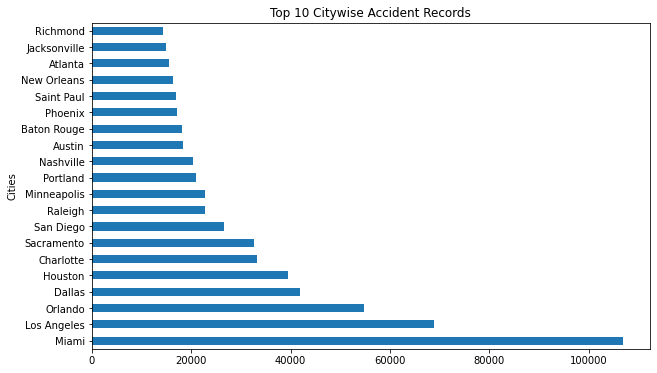

In [19]:
plt.figure(figsize=(10, 6))
cities_by_accident[:20].plot(
    kind='barh', title="Top 10 Citywise Accident Records", xlabel="Cities")


In [20]:
import seaborn as sns
sns.set_style("darkgrid")

<AxesSubplot:xlabel='City', ylabel='Count'>

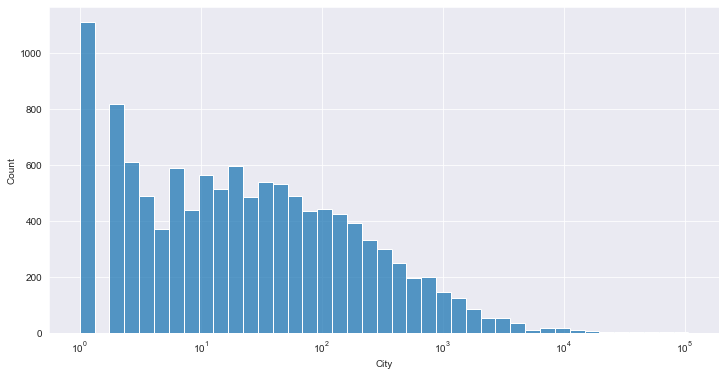

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(cities_by_accident, log_scale=True)

In [22]:
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

In [23]:
len(cities_by_accident[cities_by_accident > 1000])


494

In [24]:
states_by_accident = df.State.value_counts()
states_by_accident[:5]


CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
Name: State, dtype: int64

<AxesSubplot:title={'center':'Top 10 Statewise Accident Records'}, ylabel='States'>

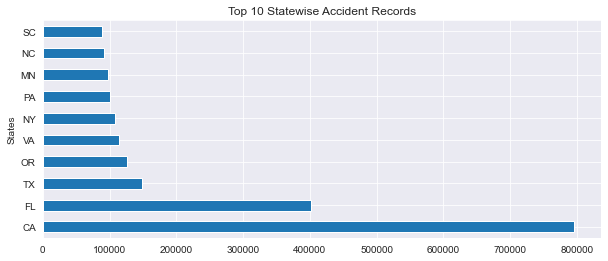

In [25]:
plt.figure(figsize=(10, 4))
states_by_accident[:10].plot(kind='barh', title="Top 10 Statewise Accident Records", xlabel="States")


In [26]:
print(f"% of accidents recorded in CA & FL: {sum(states_by_accident[['CA','FL']]) / sum(states_by_accident) * 100:.2f}%")

% of accidents recorded in CA & FL: 42.08%


### Time Series Analysis

In [27]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [28]:
df.Start_Time = pd.to_datetime(df.Start_Time)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

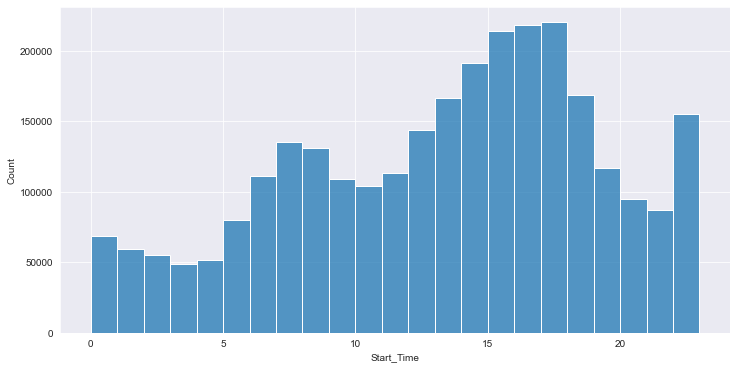

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df.Start_Time.dt.hour, binwidth=1)

In [30]:
df['Date'] = df['Start_Time'].dt.date
weekdays_df = df[(df.Start_Time.dt.dayofweek != 5) & (
    df.Start_Time.dt.dayofweek != 6)]
weekend_df = df[(df.Start_Time.dt.dayofweek == 5) | (
    df.Start_Time.dt.dayofweek == 6)]


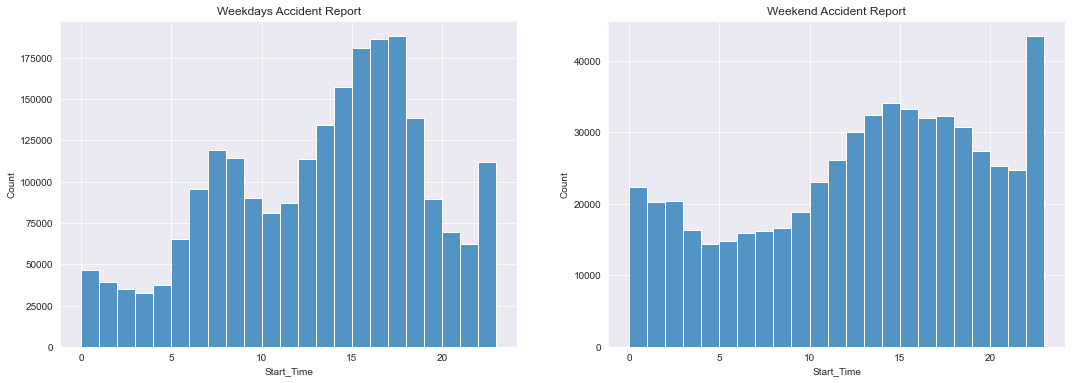

In [31]:
plt.figure(figsize=(18, 6))
plt.subplot(121, title="Weekdays Accident Report")
ax = sns.histplot(weekdays_df.Start_Time.dt.hour, kde=False, binwidth=1)
plt.subplot(122, title="Weekend Accident Report")
ax = sns.histplot(weekend_df.Start_Time.dt.hour, kde=False, binwidth=1)


In [32]:
total_days = df['Date'].nunique()
print(f"Overall accidents per day: {len(df)//total_days}")
total_weekdays = weekdays_df['Date'].nunique()
print(f"Accidents per day in weekdays: {len(weekdays_df)//total_weekdays}")
total_weekend_days = weekend_df['Date'].nunique()
print(f"Accidents per day in weekends: {len(weekend_df)//total_weekend_days}")


Overall accidents per day: 1355
Accidents per day in weekdays: 1510
Accidents per day in weekends: 962


- In Weekdays
    - A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work).
    - Next higest percentage is 3 pm to 6 pm.
<br>
<br>
- In Weekends
    - A high percentage of accidents occur between 12 pm to 5 pm.
    - Comparitively higher percentage of accident happens during midnights in weekends than in weekdays.
<br>
<br>   
- In overall the number of accidents in weekdays is higher than the number of accidents in weekends

c:\Users\Balaji\Envs\DS_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Day of week Accident Report'}, xlabel='Day of week', ylabel='Accidents reported %'>

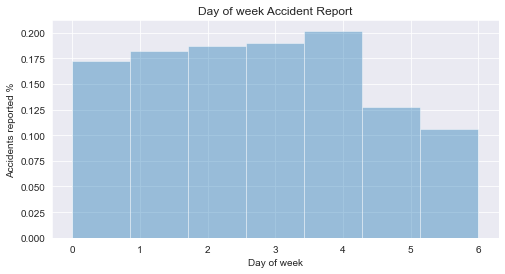

In [33]:
plt.figure(figsize=(8, 4))
plt.subplot(111, title="Day of week Accident Report", ylabel="Accidents reported %")
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True, axlabel="Day of week")

C:\Users\Balaji\AppData\Local\Temp\ipykernel_29568\3234959324.py:11: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


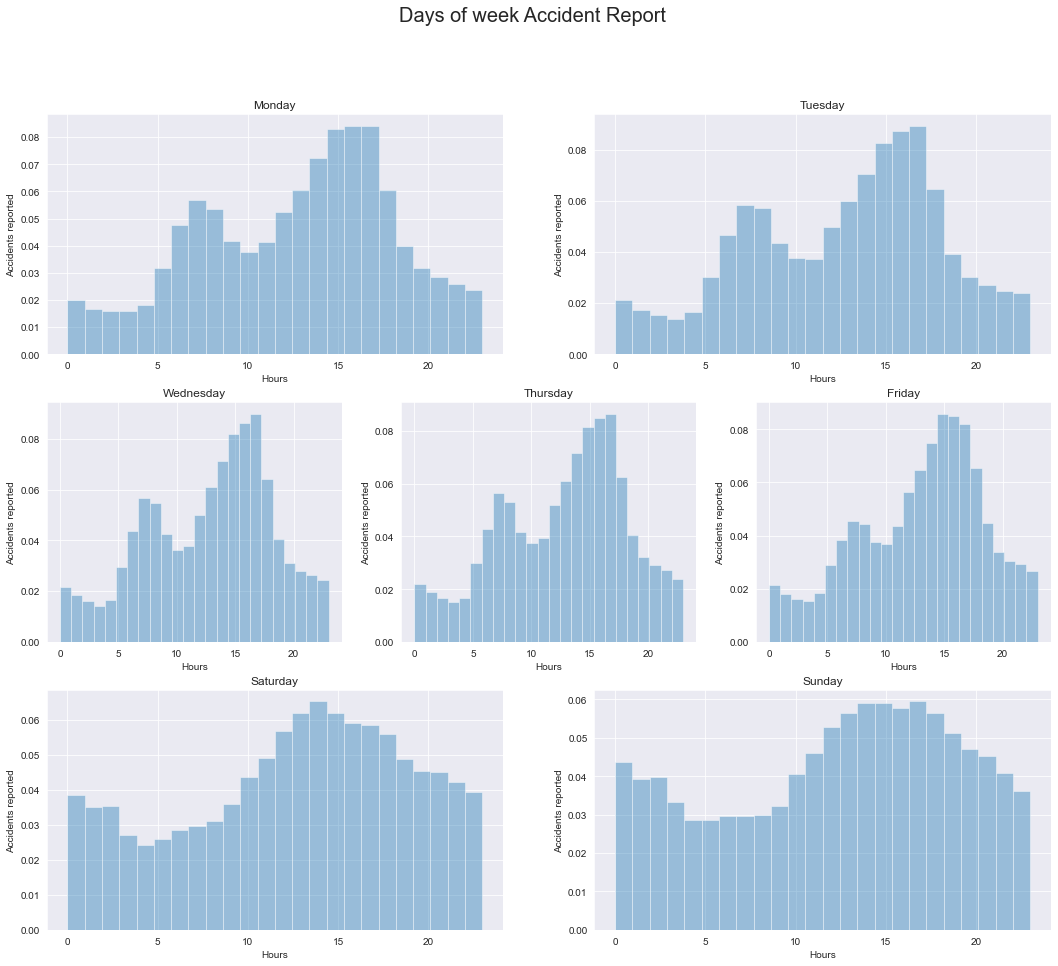

In [34]:
import datetime

plt.figure(figsize=(18,15))
plt.suptitle("Days of week Accident Report", fontsize=20)
plt_index = [321,322,334,335,336,325,326]
for i in range(len(plt_index)):
    day = df.Start_Time[df.Start_Time.dt.dayofweek ==
                        i].iloc[0].strftime("%A")
    plt.subplot(plt_index[i], title=day, ylabel="Accidents reported")
    sns.distplot(df.Start_Time[df.Start_Time.dt.dayofweek == i].dt.hour, bins=24, kde=False, norm_hist=True, axlabel="Hours")
plt.tight_layout()




- Same trend is noticed during weekdays
- Both Saturdays and Sundays follow the almost same trend in hourly accident report

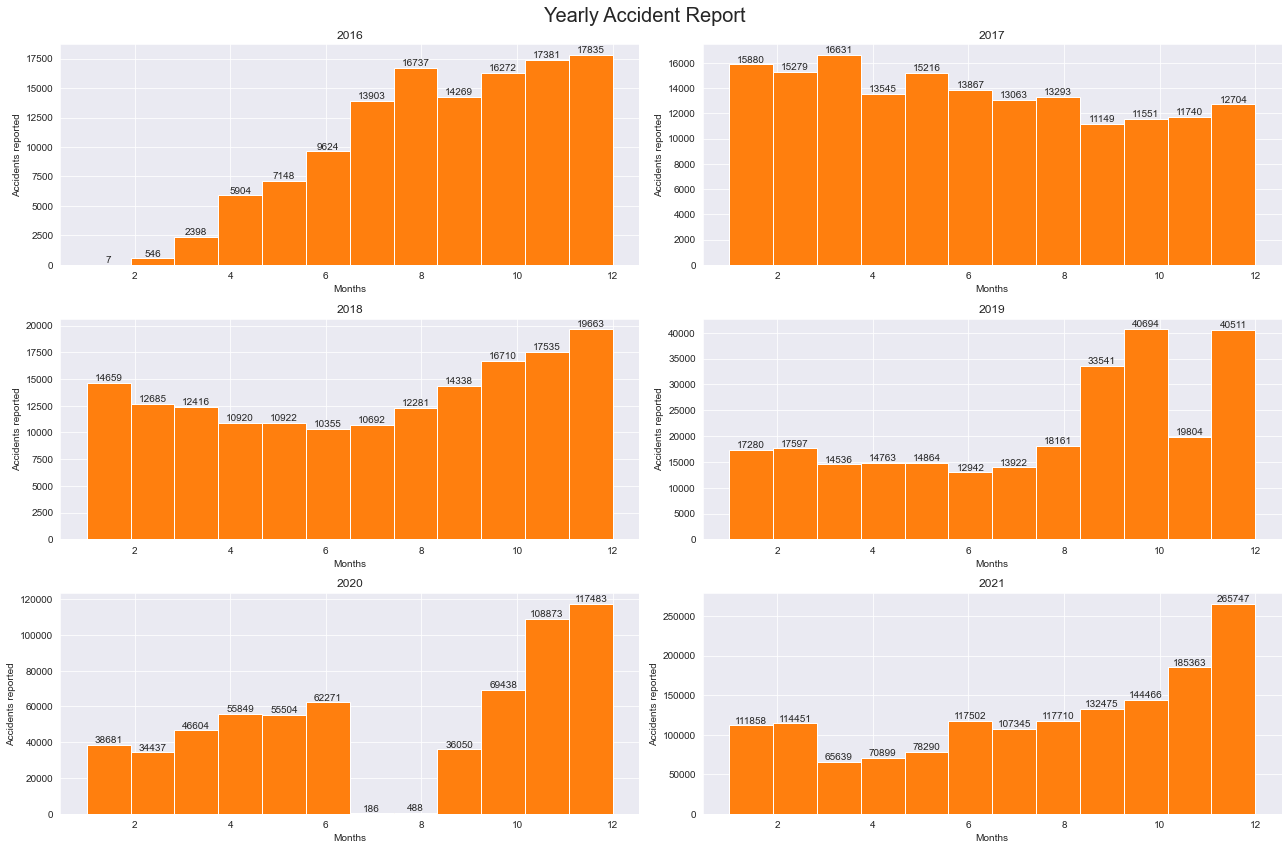

In [35]:
plt.figure(figsize=(18, 12))
plt.suptitle("Yearly Accident Report", fontsize=20)

df_2016 = df[df.Start_Time.dt.year == 2016]
plt.subplot(321, title="2016", ylabel="Accidents reported")
sns.distplot(df_2016.Start_Time.dt.month, bins=12,
             kde=False, norm_hist=True, axlabel="Months")
counts, edges, bars = plt.hist(df_2016.Start_Time.dt.month, bins=12)
plt.bar_label(bars)

df_2017 = df[df.Start_Time.dt.year == 2017]
plt.subplot(322, title="2017", ylabel="Accidents reported")
sns.distplot(df_2017.Start_Time.dt.month, bins=12,
             kde=False, norm_hist=True, axlabel="Months")
counts, edges, bars = plt.hist(df_2017.Start_Time.dt.month, bins=12)
plt.bar_label(bars)

df_2018 = df[df.Start_Time.dt.year == 2018]
plt.subplot(323, title="2018", ylabel="Accidents reported")
sns.distplot(df_2018.Start_Time.dt.month, bins=12,
             kde=False, norm_hist=True, axlabel="Months")
counts, edges, bars = plt.hist(df_2018.Start_Time.dt.month, bins=12)
plt.bar_label(bars)

df_2019 = df[df.Start_Time.dt.year == 2019]
plt.subplot(324, title="2019", ylabel="Accidents reported")
sns.distplot(df_2019.Start_Time.dt.month, bins=12,
             kde=False, norm_hist=True, axlabel="Months")
counts, edges, bars = plt.hist(df_2019.Start_Time.dt.month, bins=12)
plt.bar_label(bars)

df_2020 = df[df.Start_Time.dt.year == 2020]
plt.subplot(325, title="2020", ylabel="Accidents reported")
sns.distplot(df_2020.Start_Time.dt.month, bins=12,
             kde=False, norm_hist=True, axlabel="Months")
counts, edges, bars = plt.hist(df_2020.Start_Time.dt.month, bins=12)
plt.bar_label(bars)

df_2021 = df[df.Start_Time.dt.year == 2021]
plt.subplot(326, title="2021", ylabel="Accidents reported")
sns.distplot(df_2021.Start_Time.dt.month, bins=12,
             kde=False, norm_hist=True, axlabel="Months")
counts, edges, bars = plt.hist(df_2021.Start_Time.dt.month, bins=12)
plt.bar_label(bars)
plt.tight_layout()


<AxesSubplot:title={'center':'Montly Accident Report'}, xlabel='Months', ylabel='Accidents reported'>

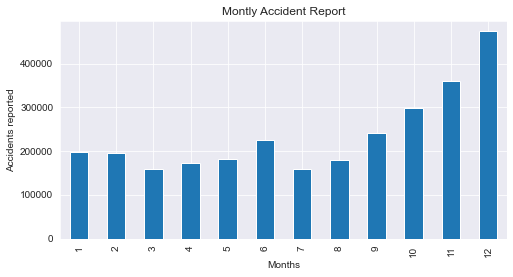

In [36]:
plt.figure(figsize=(8,4))
plt.subplot(111, title="Montly Accident Report", xlabel="Months", ylabel="Accidents reported")
(df.Start_Time.dt.month.value_counts()).sort_index().plot(kind="bar")

* It seems like there is probably some missing data in Jan-2016 and July-August of 2020.
* The uniform trend of accident is noticed only in 2017 and hence the truthness of data needs to be checked.


<AxesSubplot:title={'center':'Montly Accident Report(2017-2019,2021)'}, xlabel='Months', ylabel='Accidents reported'>

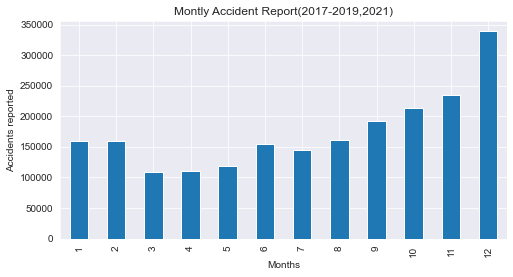

In [37]:
plt.figure(figsize=(8, 4))
plt.subplot(111, title="Montly Accident Report(2017-2019,2021)",
            xlabel="Months", ylabel="Accidents reported")
df[(df.Start_Time.dt.year != 2016) & (df.Start_Time.dt.year != 2020)
   ].Start_Time.dt.month.value_counts().sort_index().plot(kind="bar")


* By ommiting those years with suspected missing data, the trend of accidents varies for the months July & August with average rise in accidents

<AxesSubplot:ylabel='Weather Condition'>

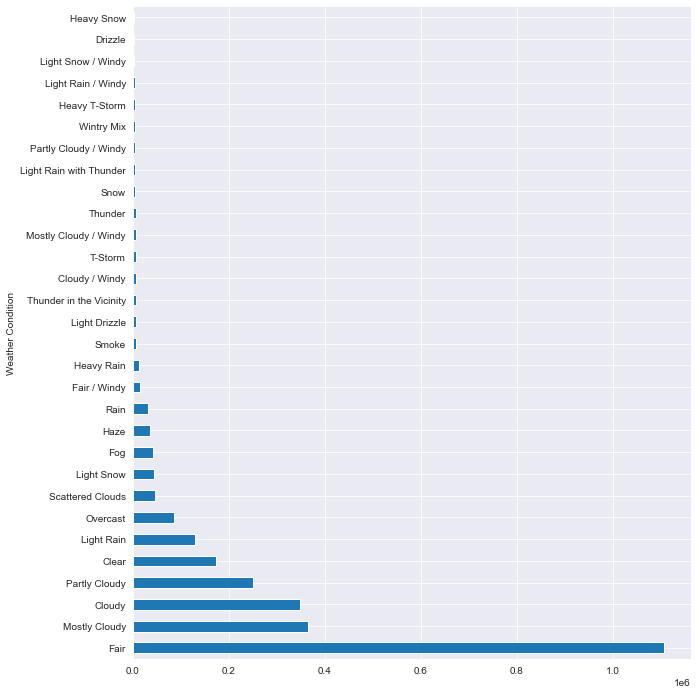

In [38]:
plt.figure(figsize=(10, 12))
(df.Weather_Condition.value_counts()[:30]).plot(
    kind="barh", xlabel="Weather Condition")


In [39]:
df[df.Start_Time.dt.month==12]['Visibility(mi)'].value_counts().head()

10.0    337454
7.0      15232
2.0      13273
1.0      12537
5.0      12378
Name: Visibility(mi), dtype: int64

### Start Latitude & Longitude


In [40]:
df.Start_Lat.head()

0    40.108910
1    39.865420
2    39.102660
3    41.062130
4    39.172393
Name: Start_Lat, dtype: float64

In [41]:
df.Start_Lng.head()

0   -83.092860
1   -84.062800
2   -84.524680
3   -81.537840
4   -84.492792
Name: Start_Lng, dtype: float64

In [42]:
sample_df = df.sample(int(0.2 * len(df)))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

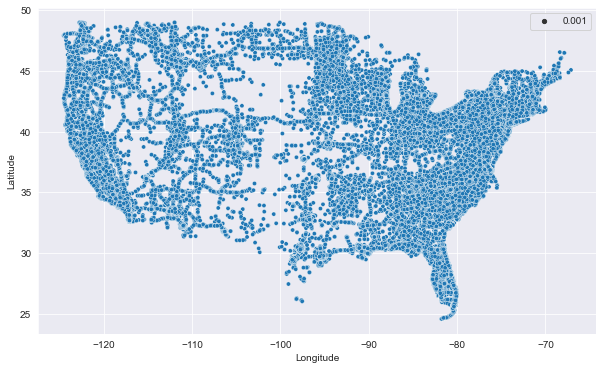

In [43]:
plt.figure(figsize=(10,6))
plt.subplot(xlabel="Longitude", ylabel="Latitude")
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)


In [44]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [45]:
for x in df[['Start_Lat', 'Start_Lng']].sample(5).itertuples():
    print(x)

Pandas(Index=1224319, Start_Lat=33.535727, Start_Lng=-80.564988)
Pandas(Index=829804, Start_Lat=40.130052, Start_Lng=-75.026276)
Pandas(Index=364493, Start_Lat=32.463143, Start_Lng=-93.779976)
Pandas(Index=2648877, Start_Lat=33.245984, Start_Lng=-85.155473)
Pandas(Index=108852, Start_Lat=33.98561, Start_Lng=-117.3457)


In [46]:
import folium
from folium.plugins import HeatMap
sample_df = df.sample(int(0.02 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map


## Other Columns

In [47]:
rows_bfr = df.shape[0]
df.dropna(inplace=True)
rows_aftr = df.shape[0]
print("Rows Dropped: ", rows_bfr - rows_aftr)
print(
    f"Percentage of rows dropped: {(rows_bfr - rows_aftr) / rows_bfr * 100:.2f}")


Rows Dropped:  638017
Percentage of rows dropped: 22.42


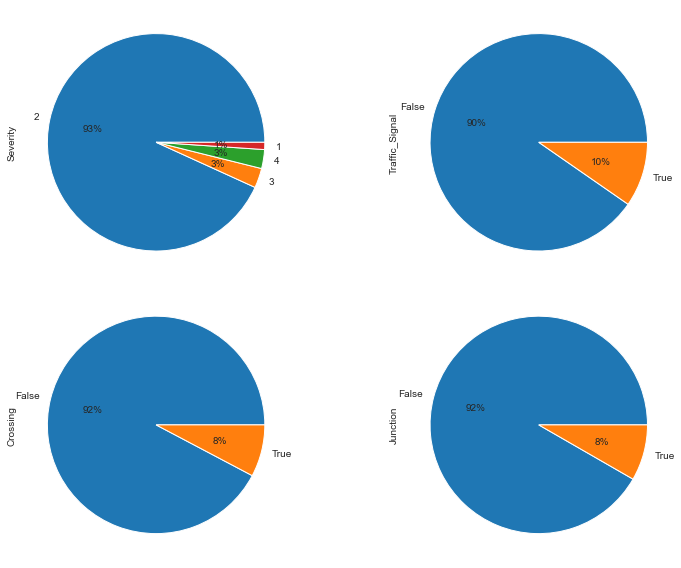

In [48]:
plt.figure(figsize=(12,8))
plt.subplot(221)
df.Severity.value_counts().plot(kind="pie", autopct='%.0f%%')
plt.subplot(222)
df.Traffic_Signal.value_counts().plot(kind="pie", autopct='%.0f%%')
plt.subplot(223)
df.Crossing.value_counts().plot(kind="pie", autopct='%.0f%%')
plt.subplot(224)
df.Junction.value_counts().plot(kind="pie", autopct='%.0f%%')
plt.tight_layout()

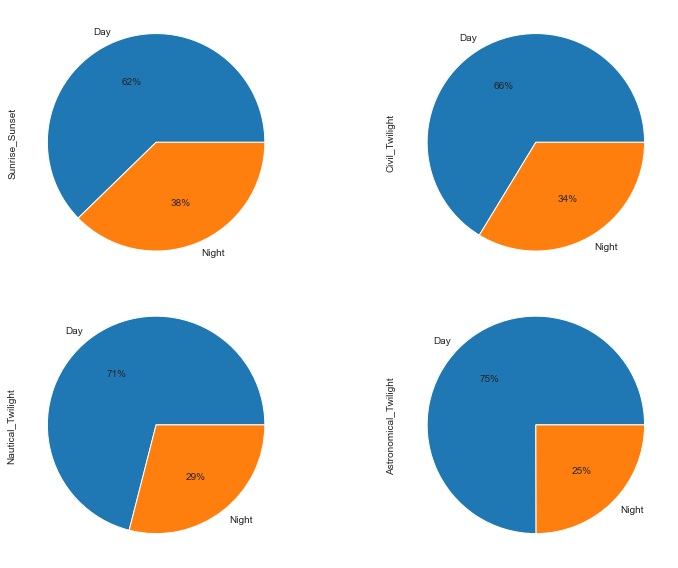

In [49]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
df.Sunrise_Sunset.value_counts().plot(kind="pie", autopct='%.0f%%')
plt.subplot(222)
df.Civil_Twilight.value_counts().plot(kind="pie", autopct='%.0f%%')
plt.subplot(223)
df.Nautical_Twilight.value_counts().plot(kind="pie", autopct='%.0f%%')
plt.subplot(224)
df.Astronomical_Twilight.value_counts().plot(kind="pie", autopct='%.0f%%')
plt.tight_layout()


c:\Users\Balaji\Envs\DS_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Balaji\Envs\DS_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


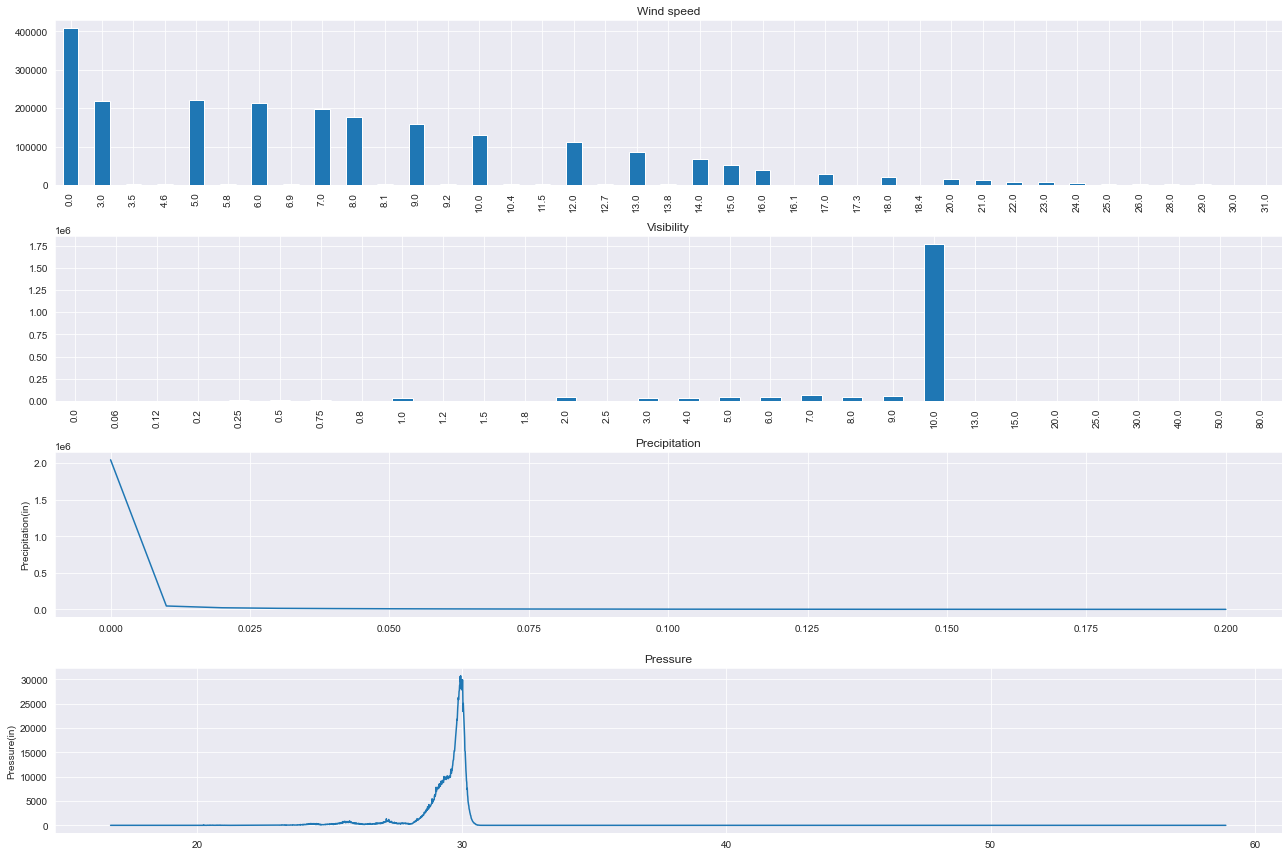

In [50]:
plt.figure(figsize=(18, 12))

plt.subplot(411, title="Wind speed")
wind_speed_count = df["Wind_Speed(mph)"].value_counts().sort_index()
wind_speed_count[wind_speed_count > 500].plot(kind="bar")
plt.subplot(412, title="Visibility")
visibility_count = df["Visibility(mi)"].value_counts().sort_index()
visibility_count[visibility_count > 100].plot(kind="bar")
plt.subplot(413, title="Precipitation")
Precp_count = df["Precipitation(in)"].value_counts()
sns.lineplot(list(Precp_count[Precp_count > 1000].index),
             Precp_count[Precp_count > 1000])
plt.subplot(414, title="Pressure")
sns.lineplot(df["Pressure(in)"].value_counts().index,
             df["Pressure(in)"].value_counts())
plt.tight_layout()


<AxesSubplot:xlabel='Pressure(in)', ylabel='Count'>

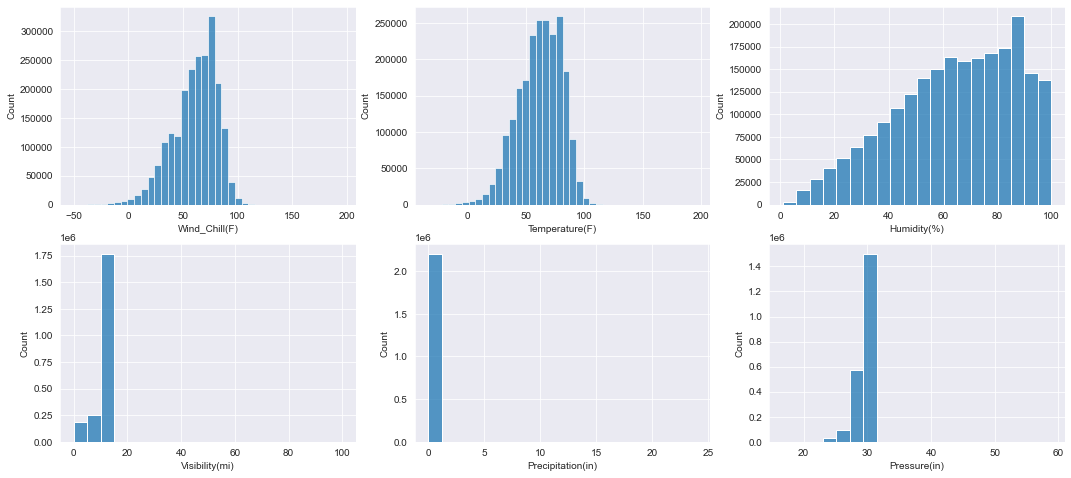

In [51]:
plt.figure(figsize=(18,8))
plt.subplot(231)
sns.histplot(df["Wind_Chill(F)"], bins=40)
plt.subplot(232)
sns.histplot(df["Temperature(F)"], bins=40)
plt.subplot(233)
sns.histplot(df["Humidity(%)"], bins=20)
plt.subplot(234)
sns.histplot(df["Visibility(mi)"], bins=20)
plt.subplot(235)
sns.histplot(df["Precipitation(in)"], bins=20)
plt.subplot(236)
sns.histplot(df["Pressure(in)"], bins=20)

In [52]:
print(f"Pressure(25-35): {len(df[(df['Pressure(in)']>25) & (df['Pressure(in)']<35)])}")
print(f"Pressure(below 25 & above 35): {len(df[(df['Pressure(in)']<25) | (df['Pressure(in)']>35)])}")
print(
    f"Wind Speed(>6): {len(df[df['Wind_Speed(mph)']>6])}")
print(
    f"Wind Speed(<=6): {len(df[df['Wind_Speed(mph)']<=6])}")
print(
    f"Precipitation(>=0.1): {len(df[df['Precipitation(in)']>=0.1])}")
print(
    f"Precipitation(<0.1): {len(df[df['Precipitation(in)']<0.1])}")
print(
    f"Visibility(<8): {len(df[df['Visibility(mi)']<8])}")
print(
    f"Visibility(8-10): {len(df[(df['Visibility(mi)']>=8) & (df['Visibility(mi)']<=10)])}")
print(
    f"Visibility(>10): {len(df[df['Visibility(mi)']>10])}")


Pressure(25-35): 2176620
Pressure(below 25 & above 35): 30539
Wind Speed(>6): 1143043
Wind Speed(<=6): 1064282
Precipitation(>=0.1): 35081
Precipitation(<0.1): 2172244
Visibility(<8): 332005
Visibility(8-10): 1869107
Visibility(>10): 6213


* Observation:
    * More number of accidents are reported when the wind speed is above 6mph
    * More number of accidents are reported when the visibility falls below 10mph
    * Pessure and precipitation is having less impacts over accidents as accidents happen even when they are at acceptable levels.

<AxesSubplot:ylabel='Timezone'>

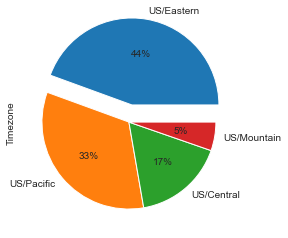

In [53]:
labels = list(df.Timezone.value_counts().index)
data = df.Timezone.value_counts()
myexplode = [0.2 if(x==data.max()) else 0 for x in data]

plt.figure(figsize=(6,4))
df.Timezone.value_counts().plot(kind="pie", labels=labels, explode=myexplode, autopct='%.0f%%')


## Summary and Conclusion

Insights:
- No data from New York
- The number of accidents per city decreases exponentially
- Less than 5% of cities have more than 1000 yearly accidents
- Over 1200 cities have reported just one accident (need to investigate)
- Accidents happen more during weekdays
- More accidents are reported during winter(May be due to skitting roads)
- Most of the accidents are near coastal areas
- California & Florida alone has contributed to 43.25% of overall accident records
- Accident rate increases from Monday to Friday(peak) and drops during the weekends
- More accidents are reported with increase in Humidity
- More accidents are reported when the wind chillness is in between 5<sup>o</sup>c to 25<sup>o</sup>c
- More number of accidents are reported when the wind speed is above 6mph
- More number of accidents are reported when the visibility falls below 10mph
